In [1]:
#
# phase3 :
#   model inference and learning
#
%matplotlib inline
import os
os.environ['THEANO_FLAGS'] = "mode=FAST_RUN,device=cpu,floatX=float32"
import theano
import theano.tensor as T
import config
import numpy as np
import matplotlib.pyplot as plt

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import network
import network.normFlow as nf
import utils
import utils.mathT as mathT
import utils.theanoGeneral as utilsT
import utils.optimizers as optimizers
import utils.data as utilsD
import utils.plotZ as plotZ
import models.mars as model
DIM = 2
floatX = utils.floatX

In [3]:
# data generation
mb = model.Banana()
mb.setTrueStd(0.7)
mb.generate(100,'./data/banana1')

In [4]:
# constructing graphical model
mb = model.Banana()
x = T.fscalar('x')
mb.setX(x)
mb.setStd(1.0)
# TODO: modify model to deal with minibatch circumstances

Size of dataset : 100.


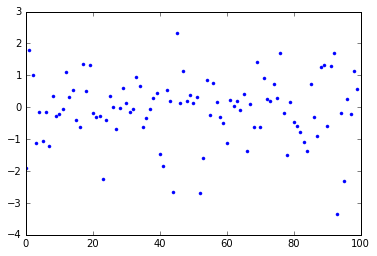

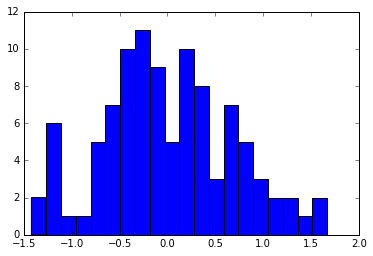

In [21]:
# loading data to object.Dataset0
rawd = np.load('./data/banana1.npz')
data = utilsD.Dataset0(rawd,autoreshuffle=True，verbose=True)
NUMX = data.getSize()

print ( 'Size of dataset : %d.'%NUMX )
# plt.plot(x,'.') # plt.show()
plt.hist( x-np.prod(z,axis=1), bins=20 )
plt.show()

In [28]:
MINI_BATCH = 10
data.setBatchSize(MINI_BATCH)

SAMPLINGNUM = 30
iafs = {}
keys = ['models','es','zs','logqzs']
for k in keys:
    iafs[k] = list()
    
for i in range(MINI_BATCH):
    model = nf.NormFlowModel(dim=2, numlayers=6, noisestd=1.)
    e = model.getNoiseVar( SAMPLINGNUM )
    z,logqz = model.reparam(e)
    
    iafs['models'].append( model )
    iafs['es'].append( e )
    iafs['zs'].append( z )
    iafs['logqzs'].append( logqz )

In [29]:
# set VI local parameters
viparams = list()
for i in range(NUMX):
    vimodel = iafs['models'][0]
    viparams.append(vimodel.getParamValues())

AttributeError: 'NormFlowModel' object has no attribute 'getParamValues'

In [4]:
# construction variational model
# iaf = nf.NormFlowModel( dim=2, numlayers=16,noisestd=1. )  #(4./DIM)**.5
# e = iaf.getNoiseVar(SAMPLINGNUM)
# z, logqz = iaf.reparam(e)

# setting cost variable
logpxz, _, _ = mb.logPxz(z)
cost = T.mean( logqz - logpxz ) # KL cost

params = iaf.getParams()
grads = [ T.grad(cost,p,consider_constant=[e]) for p in params ]

In [11]:
# optimisation setup
iaf.reInit()
# opt = optimizers.Adadelta(params)
opt = optimizers.SGD(params,lr=0.05,momentum=0.5,decay=0.001)
updates = opt.getUpdates(params,grads)

outputs = [ cost, T.mean(logpxz), T.mean(logqz) ]
estep = theano.function(inputs=[x],outputs=outputs,updates=updates)

In [26]:
# training
NUMITER = 1000
keys = ['cost','pxz','qz']
record = {}
mb.setStd(0.5)
for k in keys:
    record[k] = []
for i in range(NUMITER):
    # running updates
    out = estep(3.)
    
    for i,q in enumerate(out):
        record[keys[i]].append( q )        
for k in keys:
    record[k] = np.asarray( record[k] )

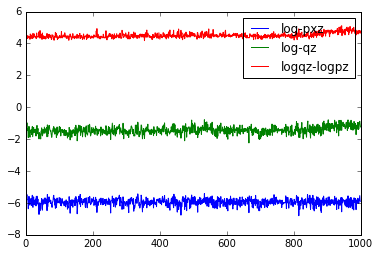

In [27]:
# plt.plot( range(NUMITER), record['cost'],'-' )
# plt.show()
xs = range(NUMITER)
plt.plot( xs, record['pxz'], '-', label='log-pxz')
plt.plot( xs, record['qz'], '-', label='log-qz')
plt.plot( xs, record['cost'], '-', label='logqz-logpz')
plt.legend()
plt.show()

In [14]:
e2 = iaf.getNoiseVar(2000)
z2, logqz2 = iaf.reparam(e2)
fez2 = theano.function(inputs=[],outputs=[e2,z2])

(2000, 2) (2000, 2)


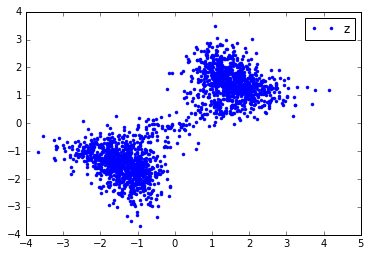

(2000, 2)
2.00271


In [15]:
es, zs = fez2()
print es.shape, zs.shape
# plt.plot(es[:,0],es[:,1],'.',label='e')
plt.plot(zs[:,0],zs[:,1],'.',label='z')
plt.legend(loc=1)
plt.show()
print zs.shape
print np.mean(np.prod(zs,axis=1))

In [3]:
out = dict()
keys = ['a','b']
out.update( )

TypeError: update expected at most 1 arguments, got 2